## analysis

***import libraries needed***

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import missingno as mn
from matplotlib import pyplot as plt

***import train and test data sets***

In [2]:
train_data = pd.read_csv('../../../../../Machine Learning/case data/hose-price-prediction/train.csv')
test_data = pd.read_csv('../../../../../Machine Learning/case data/hose-price-prediction/test.csv')

***cleaning up data***

In [3]:
# rename all feature label to lowercase
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_data.rename(str.lower,axis=1,inplace=True)
train_data.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [5]:
# redefine index column
train_data.set_index('id',inplace=True)
train_data.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# type conversion
train_data.select_dtypes(include=np.number).iloc[1].T

mssubclass           20.0
lotfrontage          80.0
lotarea            9600.0
overallqual           6.0
overallcond           8.0
yearbuilt          1976.0
yearremodadd       1976.0
masvnrarea            0.0
bsmtfinsf1          978.0
bsmtfinsf2            0.0
bsmtunfsf           284.0
totalbsmtsf        1262.0
1stflrsf           1262.0
2ndflrsf              0.0
lowqualfinsf          0.0
grlivarea          1262.0
bsmtfullbath          0.0
bsmthalfbath          1.0
fullbath              2.0
halfbath              0.0
bedroomabvgr          3.0
kitchenabvgr          1.0
totrmsabvgrd          6.0
fireplaces            1.0
garageyrblt        1976.0
garagecars            2.0
garagearea          460.0
wooddecksf          298.0
openporchsf           0.0
enclosedporch         0.0
3ssnporch             0.0
screenporch           0.0
poolarea              0.0
miscval               0.0
mosold                5.0
yrsold             2007.0
saleprice        181500.0
Name: 2, dtype: float64

In [7]:
train_data.select_dtypes(include=np.object).iloc[1].T

mszoning              RL
street              Pave
alley                NaN
lotshape             Reg
landcontour          Lvl
utilities         AllPub
lotconfig            FR2
landslope            Gtl
neighborhood     Veenker
condition1         Feedr
condition2          Norm
bldgtype            1Fam
housestyle        1Story
roofstyle          Gable
roofmatl         CompShg
exterior1st      MetalSd
exterior2nd      MetalSd
masvnrtype          None
exterqual             TA
extercond             TA
foundation        CBlock
bsmtqual              Gd
bsmtcond              TA
bsmtexposure          Gd
bsmtfintype1         ALQ
bsmtfintype2         Unf
heating             GasA
heatingqc             Ex
centralair             Y
electrical         SBrkr
kitchenqual           TA
functional           Typ
fireplacequ           TA
garagetype        Attchd
garagefinish         RFn
garagequal            TA
garagecond            TA
paveddrive             Y
poolqc               NaN
fence                NaN


***handling missing and bad data***

In [8]:
# find missing values
train_data.isna().sum().sort_values(ascending=False)

poolqc         1453
miscfeature    1406
alley          1369
fence          1179
fireplacequ     690
               ... 
heating           0
heatingqc         0
mszoning          0
1stflrsf          0
saleprice         0
Length: 80, dtype: int64

<Figure size 10800x7200 with 0 Axes>

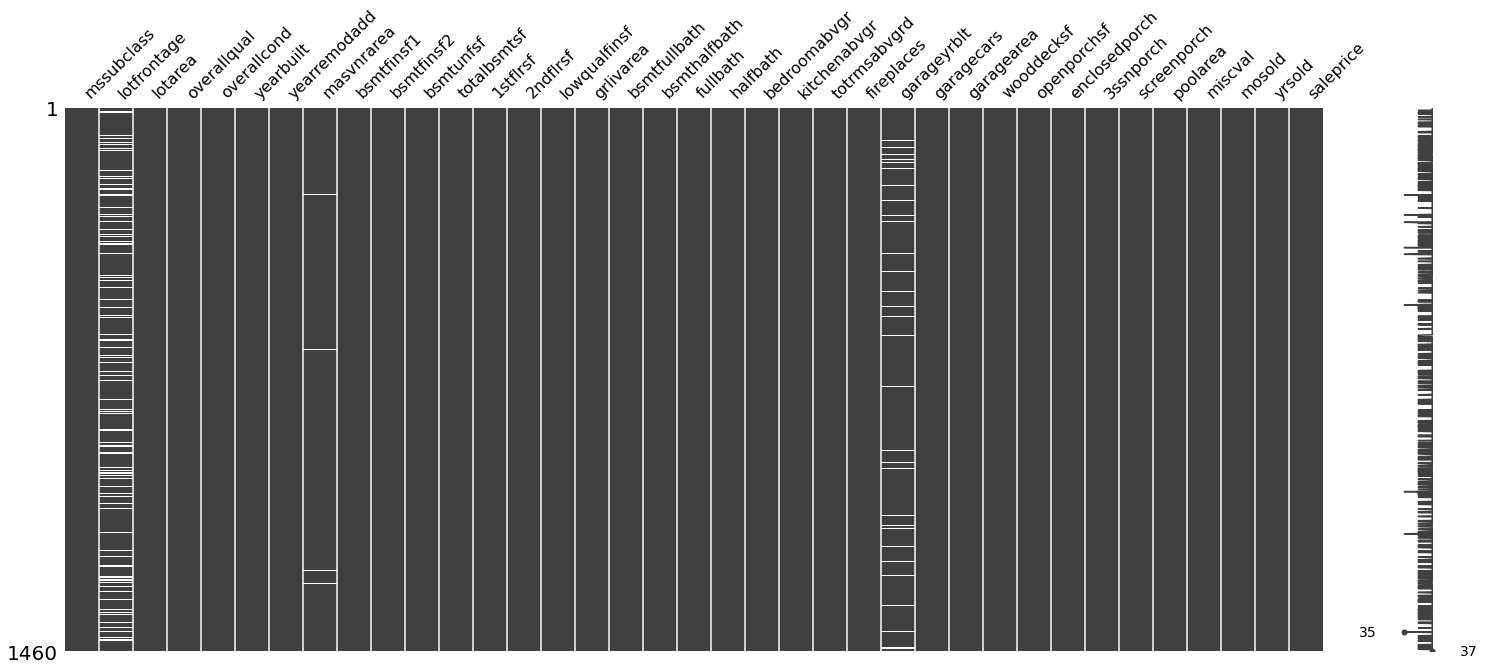

In [9]:
# visualize numerical missing data
plt.figure(figsize=[36,24],dpi=300)
mn.matrix(train_data.select_dtypes(include=np.number))
plt.show()

<Figure size 10800x7200 with 0 Axes>

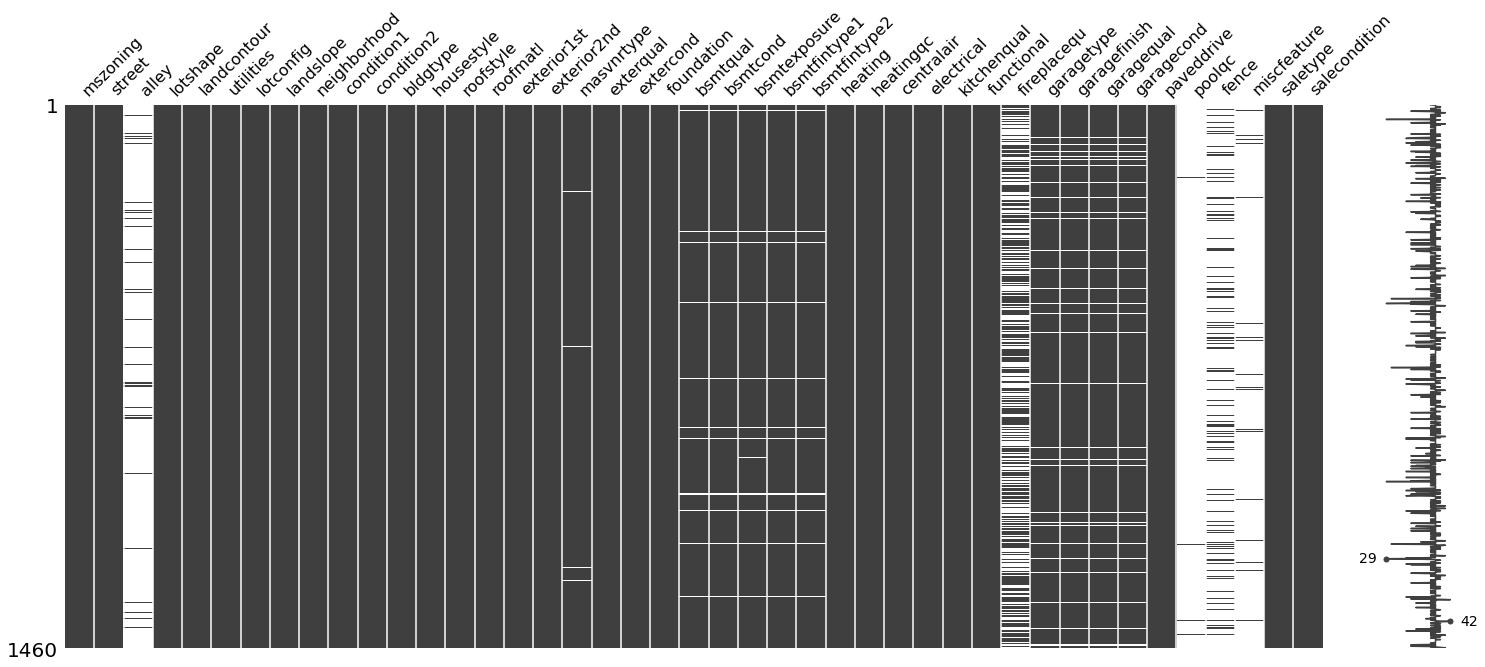

In [10]:
# visualize categorical missing data
plt.figure(figsize=[36,24],dpi=300)
mn.matrix(train_data.select_dtypes(include=np.object))
plt.show()

In [11]:
# create count and percentage of nullity of features
nullity_ = pd.DataFrame()
nullity_['feature'] = train_data.columns
nullity_['count'] = train_data.isna().sum().values
nullity_['percentage'] = nullity_['count'].apply(lambda x: (x/train_data.shape[0])*100)
nullity_

,feature,count,percentage
0,mssubclass,0,0.000000
1,mszoning,0,0.000000
2,lotfrontage,259,17.739726
3,lotarea,0,0.000000
4,street,0,0.000000
...,...,...,...
75,mosold,0,0.000000
76,yrsold,0,0.000000
77,saletype,0,0.000000
78,salecondition,0,0.000000


In [12]:
nullity_[nullity_['percentage']>0.0].sort_values(by='percentage',ascending=False)

,feature,count,percentage
71,poolqc,1453,99.520548
73,miscfeature,1406,96.301370
5,alley,1369,93.767123
72,fence,1179,80.753425
56,fireplacequ,690,47.260274
2,lotfrontage,259,17.739726
57,garagetype,81,5.547945
58,garageyrblt,81,5.547945
59,garagefinish,81,5.547945
62,garagequal,81,5.547945


In [13]:
# features with more than 80 percent missing data can't be recovered so drop them
train_data.drop(['poolqc','miscfeature','alley','fence'],axis=1,inplace=True)
train_data

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [14]:
# numerical features with na values
train_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending=False)[:3]

lotfrontage    259
garageyrblt     81
masvnrarea       8
dtype: int64

In [15]:
np.mean(train_data['masvnrarea']),np.median(train_data['masvnrarea'])

(103.68526170798899, nan)

In [16]:
# both column have same missing value indexes
train_data.iloc[np.where(train_data['masvnrtype'].isna())][['masvnrarea','masvnrtype']]

,masvnrarea,masvnrtype
id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN
978,NaN,NaN
1244,NaN,NaN
1279,NaN,NaN


c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


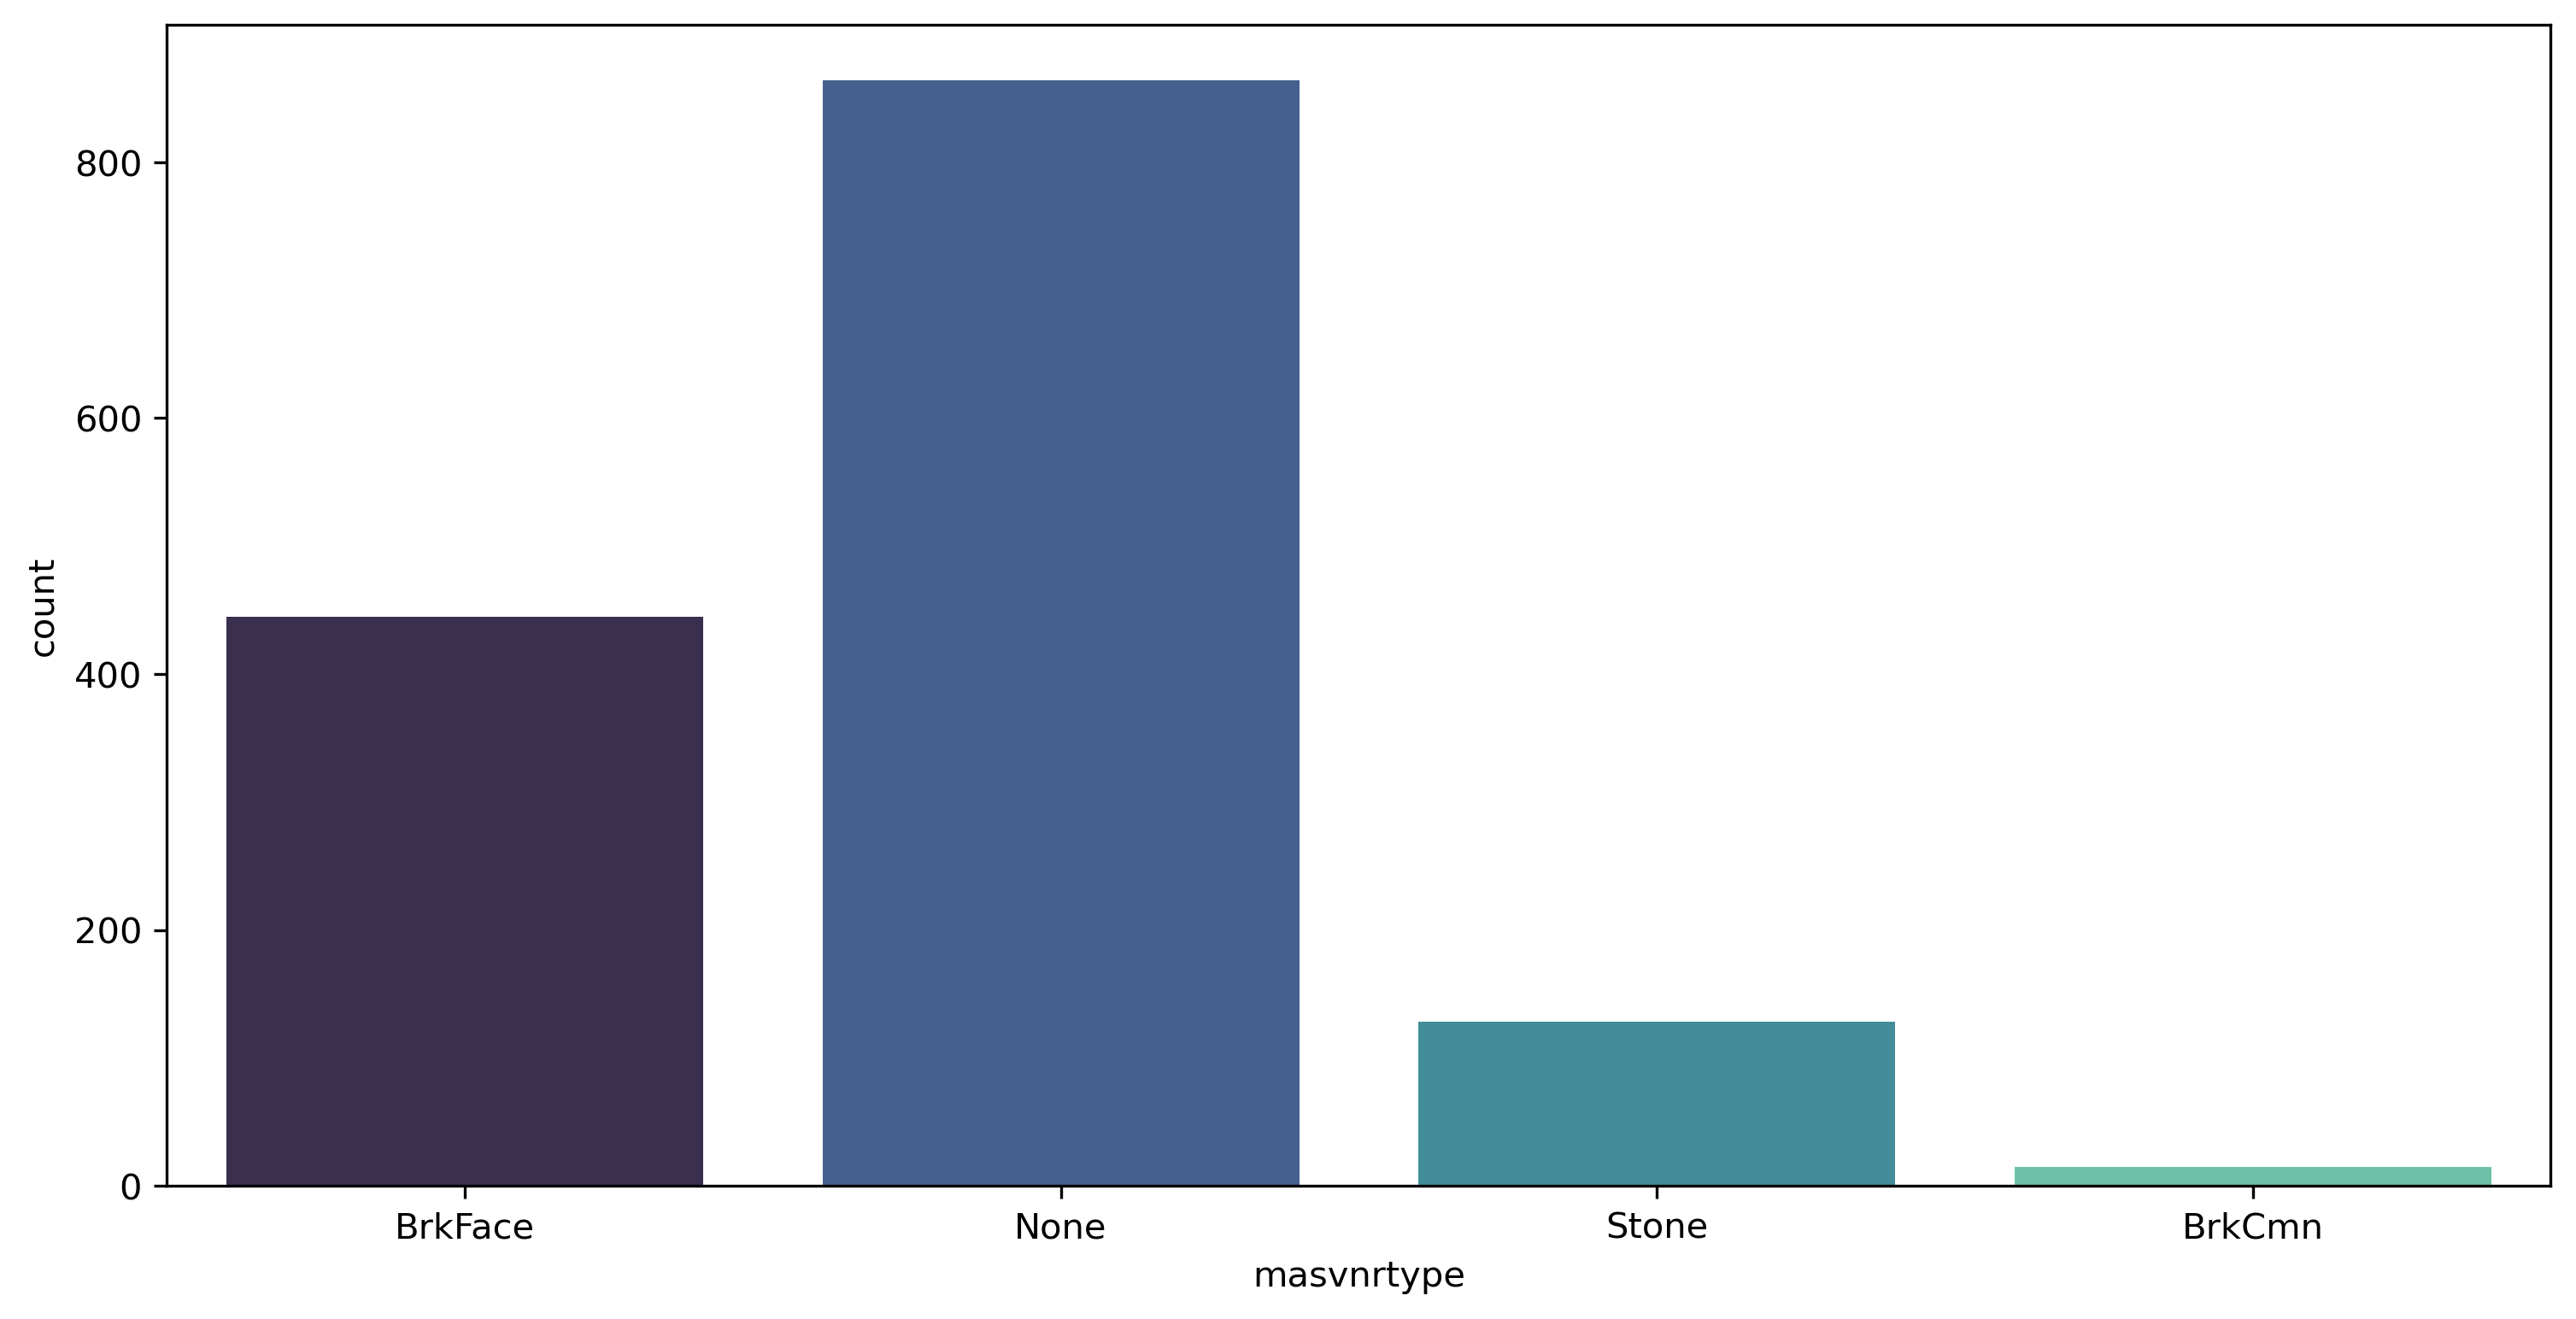

In [17]:
# so,i fill categorical feature first and then numerical feature using inferred imputation
plt.figure(figsize=[12,6],dpi=300)
sns.countplot(train_data['masvnrtype'],palette='mako')
plt.show()

In [18]:
train_data.groupby(by=['housestyle','masvnrtype'])[['masvnrtype']].count()

masvnrtype
housestyle masvnrtype            
1.5Fin     BrkCmn               2
           BrkFace             12
           None               140
1.5Unf     None                14
1Story     BrkCmn              10
           BrkFace            219
           None               406
           Stone               86
2.5Fin     None                 8
2.5Unf     None                11
2Story     BrkCmn               3
           BrkFace            163
           None               237
           Stone               39
SFoyer     BrkFace             11
           None                24
           Stone                2
SLvl       BrkFace             40
           None                24
           Stone                1

In [19]:
replacing_values = {'1.5Fin':None,
                    '1.5Unf':None,
                    '1Story':None,
                    '2.5Fin':None,
                    '2.5Unf':None,
                    '2Story':None,
                    'SFoyer':None,
                    'SLvl':'BrkFace'}
impute_values = train_data.housestyle.map(replacing_values)
train_data['masvnrtype'] = np.where(train_data.masvnrtype.isna(),
                                    impute_values,
                                    train_data.masvnrtype)

In [20]:
train_data['masvnrtype'].replace({None:'None'},inplace=True)

In [21]:
train_data['masvnrtype'].isna().sum()

0

In [22]:
# lets fill nan values in masvnrarea
replacing_with = train_data[['masvnrtype','masvnrarea']].groupby(by='masvnrtype').mean().masvnrarea.to_dict()
replacing_with

{'BrkCmn': 247.66666666666666,
 'BrkFace': 259.00898876404494,
 'None': 1.0949074074074074,
 'Stone': 239.3046875}

In [23]:
impute_with = train_data.masvnrtype.map(replacing_with)
train_data['masvnrarea'] = np.where(train_data.masvnrarea.isna(),
                                    impute_with,
                                    train_data.masvnrarea)

In [24]:
train_data['masvnrarea'].isna().sum()

0

In [25]:
train_data['garagetype'].fillna(value='None',inplace=True)

In [26]:
train_data.garagetype.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)

In [30]:
replacing_with = np.round(train_data[['garagetype','garageyrblt']].groupby(by='garagetype').mean()).garageyrblt.to_dict()
replacing_with['None'] = 0
replacing_with

{'2Types': 1966.0,
 'Attchd': 1984.0,
 'Basment': 1962.0,
 'BuiltIn': 1997.0,
 'CarPort': 1960.0,
 'Detchd': 1963.0,
 'None': 0}

In [31]:
impute_values = train_data.garagetype.map(replacing_with)
train_data['garageyrblt'] = np.where(train_data.garageyrblt.isna(),
                                     impute_values,
                                     train_data.garageyrblt)

In [32]:
train_data.garageyrblt.isna().sum()

0

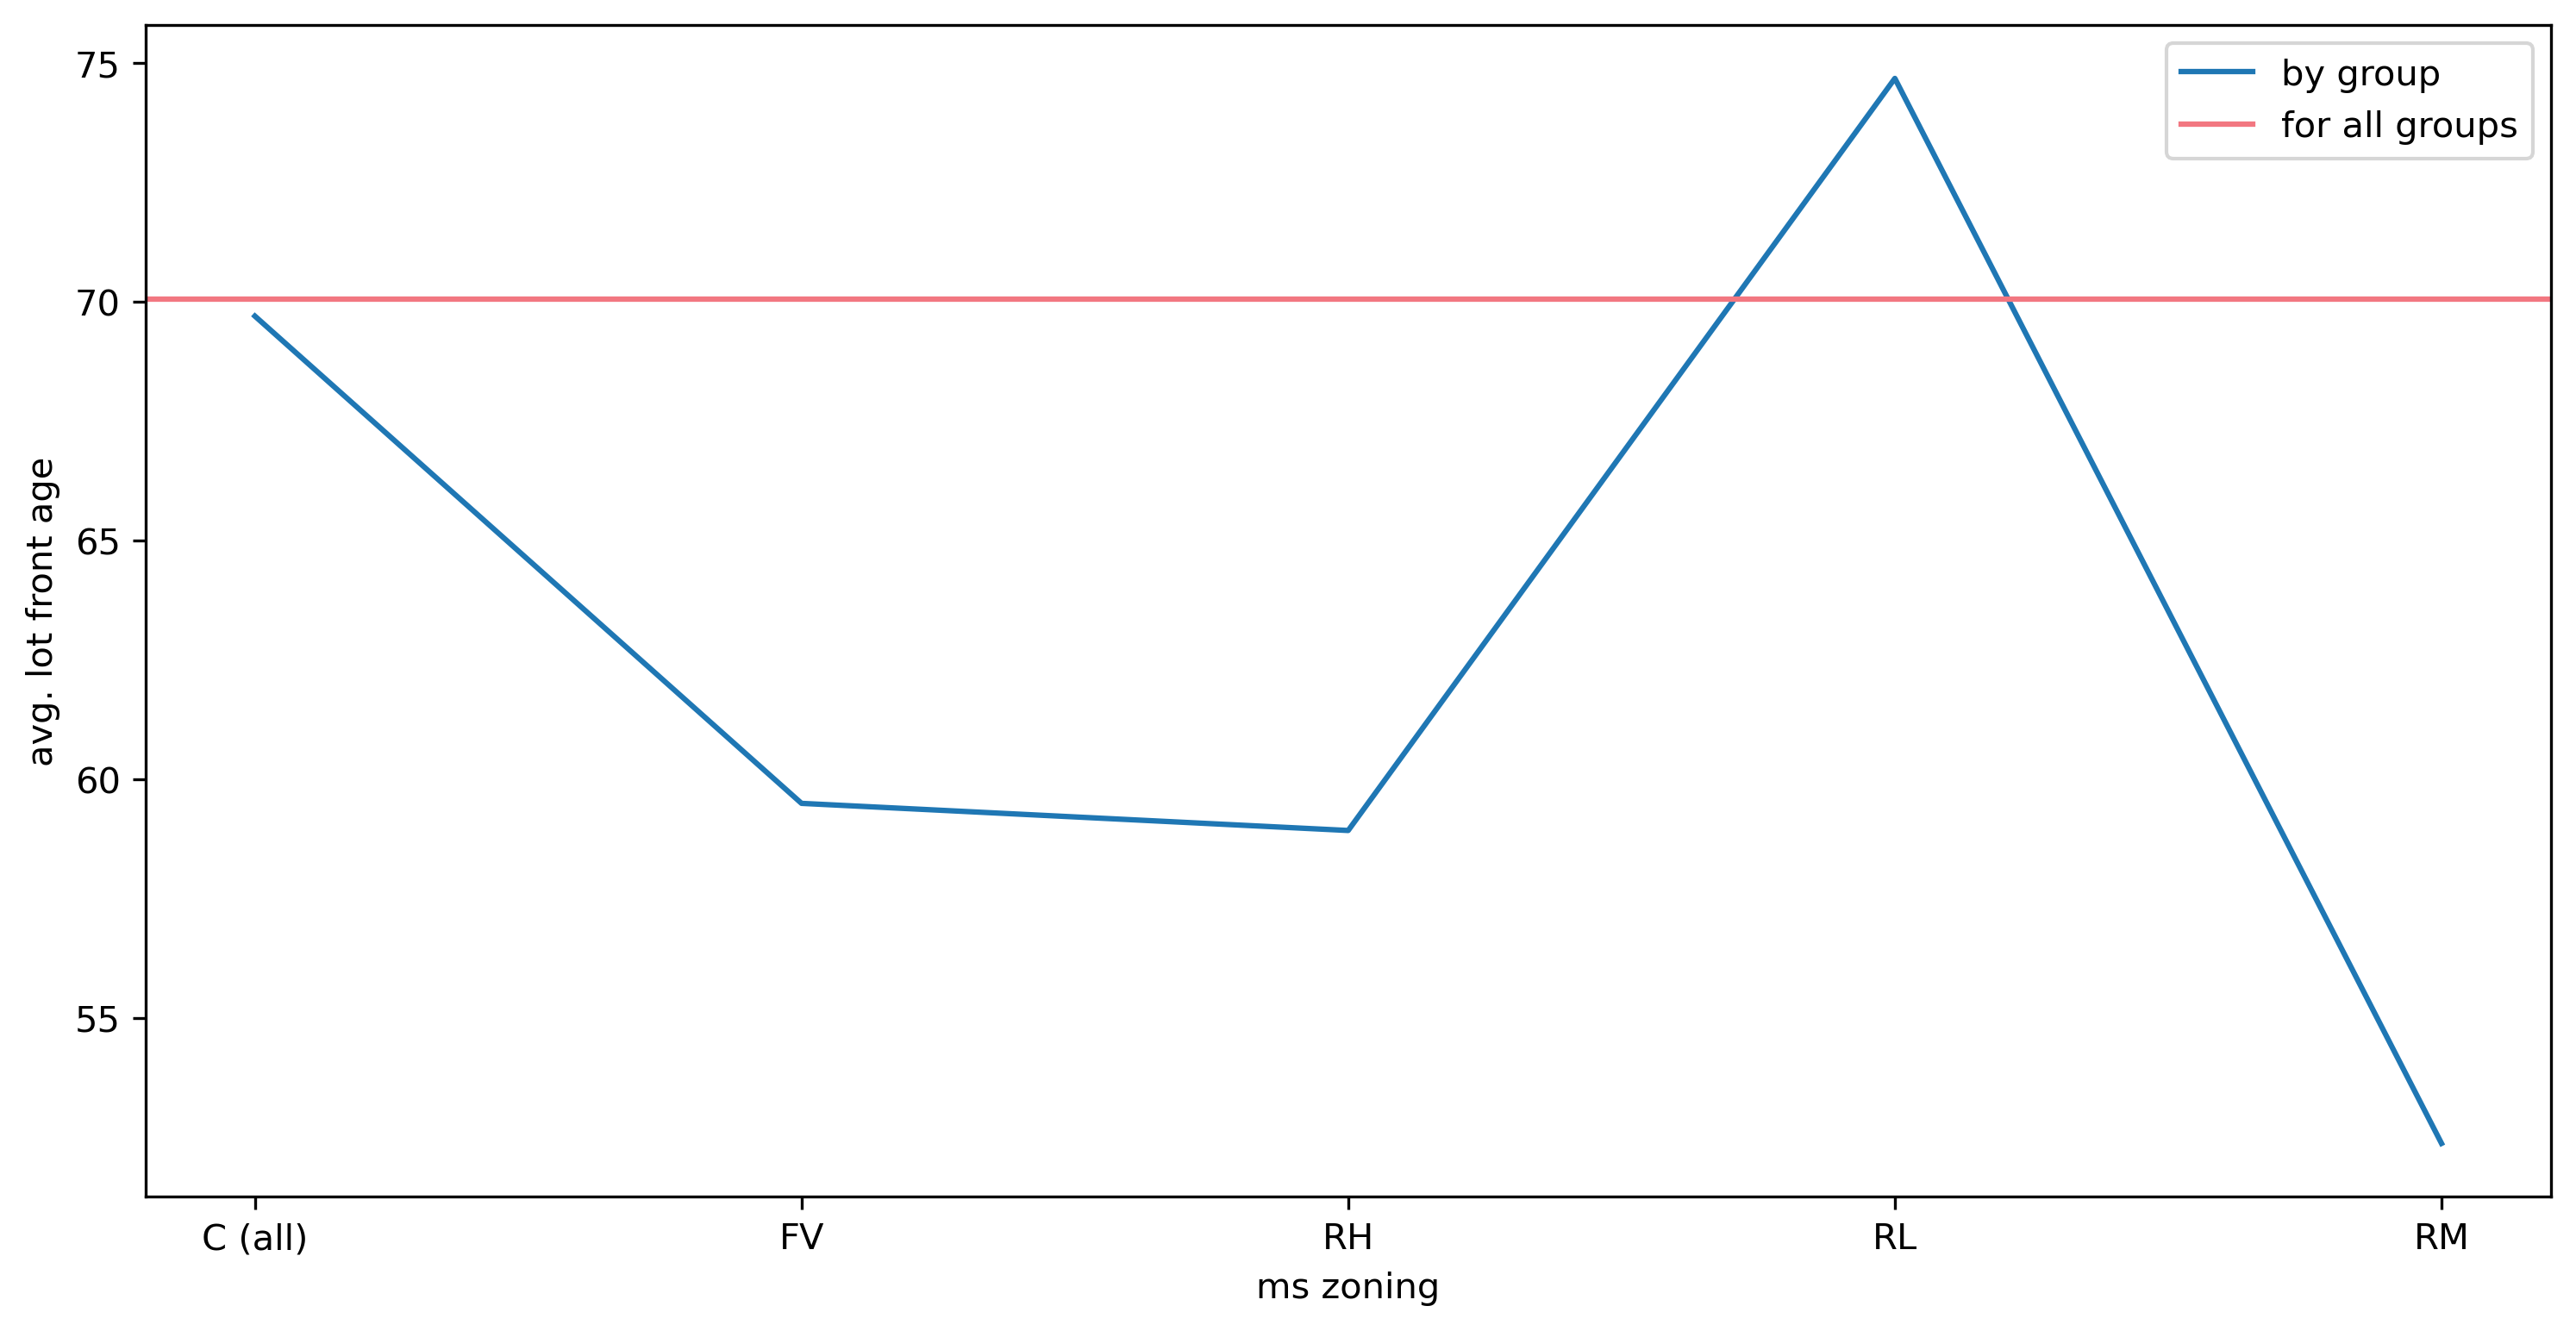

In [47]:
for_all_grps = np.mean(train_data['lotfrontage'])
for_indv_grp = train_data[['mszoning','lotfrontage']].groupby(by='mszoning').mean().lotfrontage.to_dict()

plt.figure(figsize=[12,6],dpi=300)
sns.lineplot(x=for_indv_grp.keys(),y=for_indv_grp.values(),label='by group')
plt.axhline(for_all_grps,color='#F27781',label='for all groups')
plt.xlabel('ms zoning')
plt.ylabel('avg. lot front age')
plt.legend()
plt.show()

In [48]:
impute_with = train_data.mszoning.map(for_indv_grp)
train_data['lotfrontage'] = np.where(train_data.lotfrontage.isna(),
                                     impute_with,
                                     train_data.lotfrontage)

In [49]:
train_data.lotfrontage.isna().sum()

0

In [52]:
# numerical feature imputation
train_data.select_dtypes(include=np.object).isna().sum().sort_values(ascending=False)[:10]

fireplacequ     690
garagecond       81
garagequal       81
garagefinish     81
bsmtexposure     38
bsmtfintype2     38
bsmtcond         37
bsmtfintype1     37
bsmtqual         37
electrical        1
dtype: int64

In [57]:
train_data['bsmtexposure'].unique(),train_data['bsmtfintype2'].unique(),train_data['bsmtcond'].unique(),train_data['bsmtfintype1'].unique(),train_data['bsmtqual'].unique()

(array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object),
 array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object),
 array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object),
 array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object),
 array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object))

In [59]:
# in meta data bsmtcond nan means there isn't basement so i replace na values with none
train_data['bsmtcond'].fillna(value='None',inplace=True)
train_data['bsmtcond'].isna().sum()

0

In [61]:
train_data[['bsmtcond','bsmtexposure']].groupby(by=['bsmtcond','bsmtexposure'])[['bsmtexposure']].count()

bsmtexposure
bsmtcond bsmtexposure              
Fa       Gd                       1
         Mn                       5
         No                      39
Gd       Av                      14
         Gd                      10
         Mn                       5
         No                      36
Po       Gd                       1
         No                       1
TA       Av                     207
         Gd                     122
         Mn                     104
         No                     877

In [62]:
replace_with = {'Fa':'No',
                'Gd':'Av',
                'Po':'Gd',
                'TA':'No',
                'None':'No'}
impute_with = train_data.bsmtcond.map(replace_with)
train_data['bsmtexposure'] = np.where(train_data.bsmtexposure.isna(),
                                      impute_with,
                                      train_data.bsmtexposure)
train_data.bsmtexposure.isna().sum()

0

In [65]:
train_data.bsmtfintype1.fillna(value='None',inplace=True)
train_data.bsmtfintype1.isna().sum()

0

In [69]:
train_data[['bsmtfintype1','bsmtfintype2']].groupby(by=['bsmtfintype1','bsmtfintype2'])[['bsmtfintype2']].count()

bsmtfintype2
bsmtfintype1 bsmtfintype2              
ALQ          BLQ                     15
             GLQ                      2
             LwQ                     15
             Rec                     22
             Unf                    166
BLQ          ALQ                      2
             BLQ                      1
             GLQ                      5
             LwQ                     13
             Rec                     15
             Unf                    112
GLQ          ALQ                      4
             BLQ                      2
             LwQ                     10
             Rec                      9
             Unf                    392
LwQ          ALQ                      9
             BLQ                      4
             GLQ                      7
             Rec                      8
             Unf                     46
Rec          ALQ                      4
             BLQ                     11
             LwQ                      8
             Unf                    110
Unf          Unf                    430

In [70]:
replace_with = {'ALQ':'Unf',
                'BLQ':'Unf',
                'GLQ':'Unf',
                'LwQ':'Unf',
                'Rec':'Unf',
                'Unf':'Unf',
                'None':'None'}
impute_with = train_data.bsmtfintype1.map(replace_with)
train_data['bsmtfintype2'] = np.where(train_data.bsmtfintype2.isna(),
                                      impute_with,
                                      train_data.bsmtfintype2)
train_data.bsmtfintype2.isna().sum()

0

In [77]:
train_data.iloc[np.where(train_data['garagecond'].isna())][['garagecond','garagequal','garagefinish']]

,garagecond,garagequal,garagefinish
id,,,
40,NaN,NaN,NaN
49,NaN,NaN,NaN
79,NaN,NaN,NaN
89,NaN,NaN,NaN
90,NaN,NaN,NaN
100,NaN,NaN,NaN
109,NaN,NaN,NaN
126,NaN,NaN,NaN
128,NaN,NaN,NaN


In [78]:
# na values are lie on same rows so, replace them with none
# because na means no garage (that's in documentation)
train_data['garagecond'].fillna(value='None',inplace=True)
train_data['garagequal'].fillna(value='None',inplace=True)
train_data['garagefinish'].fillna(value='None',inplace=True)
train_data.garagecond.isna().sum()

0

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


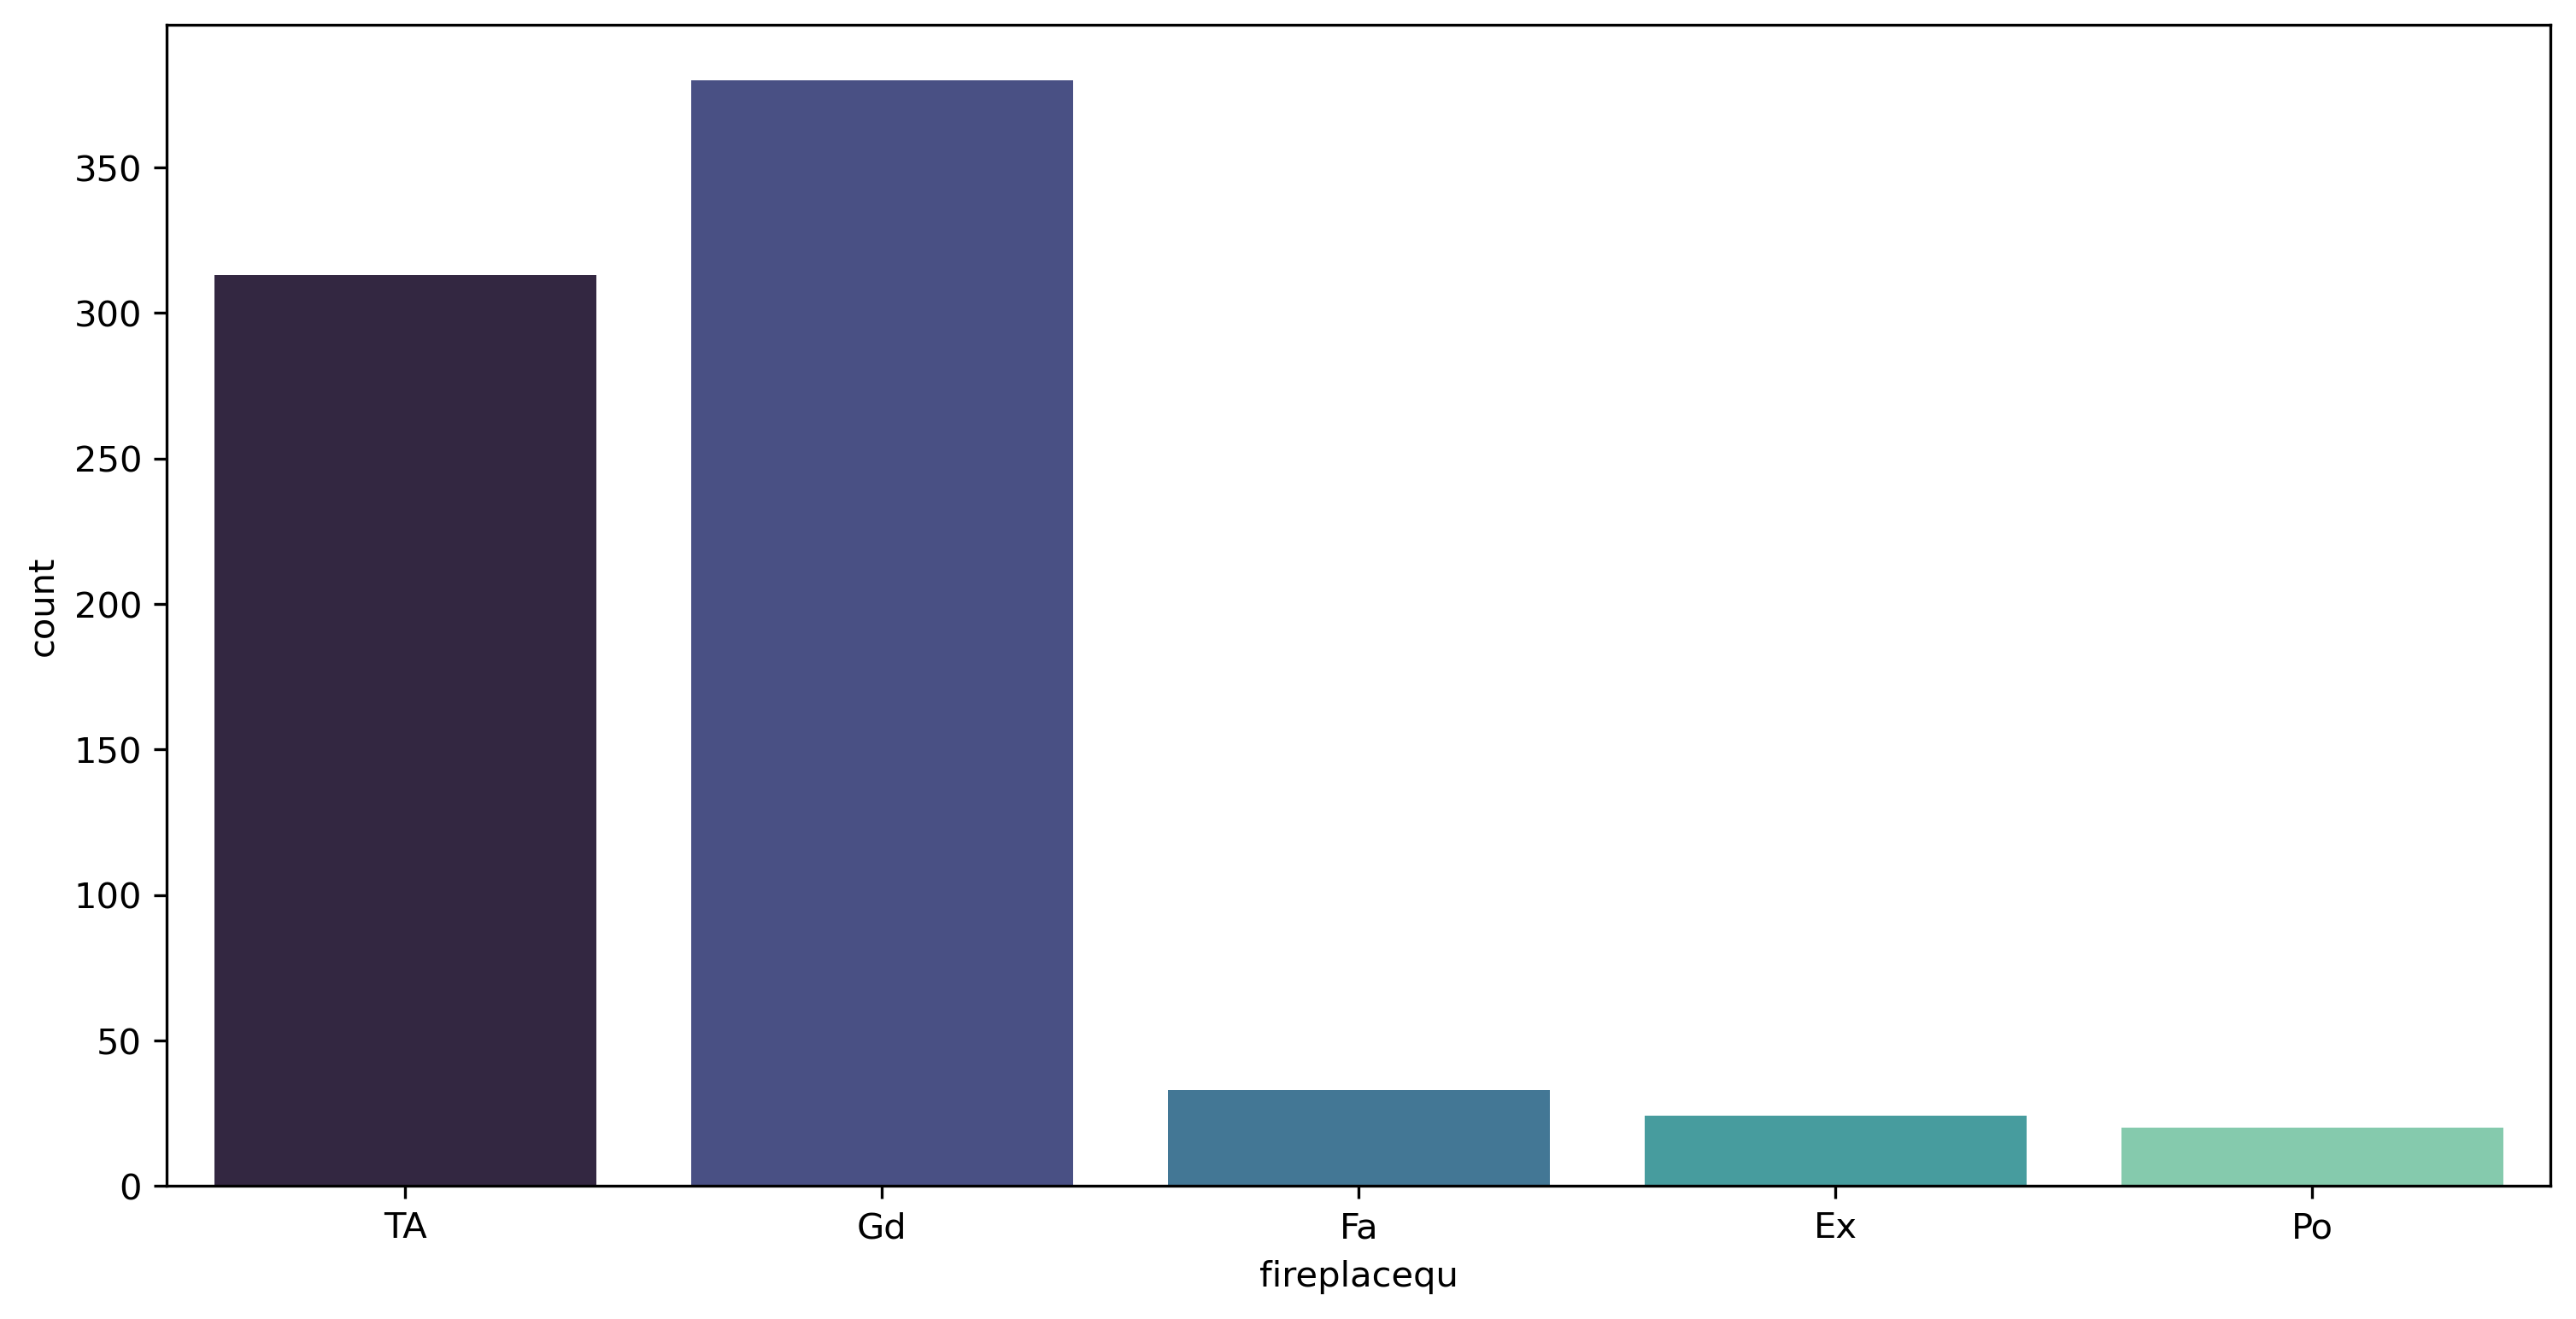

In [79]:
plt.figure(figsize=[12,6],dpi=300)
sns.countplot(train_data['fireplacequ'],palette='mako')
plt.show()

In [84]:
train_data.iloc[np.where(train_data['fireplacequ'].isna())][['fireplacequ','fireplaces']]

,fireplacequ,fireplaces
id,,
1,NaN,0
6,NaN,0
11,NaN,0
13,NaN,0
16,NaN,0
...,...,...
1453,NaN,0
1454,NaN,0
1455,NaN,0


In [85]:
train_data['fireplacequ'].fillna(value='None',inplace=True)
train_data.fireplacequ.isna().sum()

0

<Figure size 10800x7200 with 0 Axes>

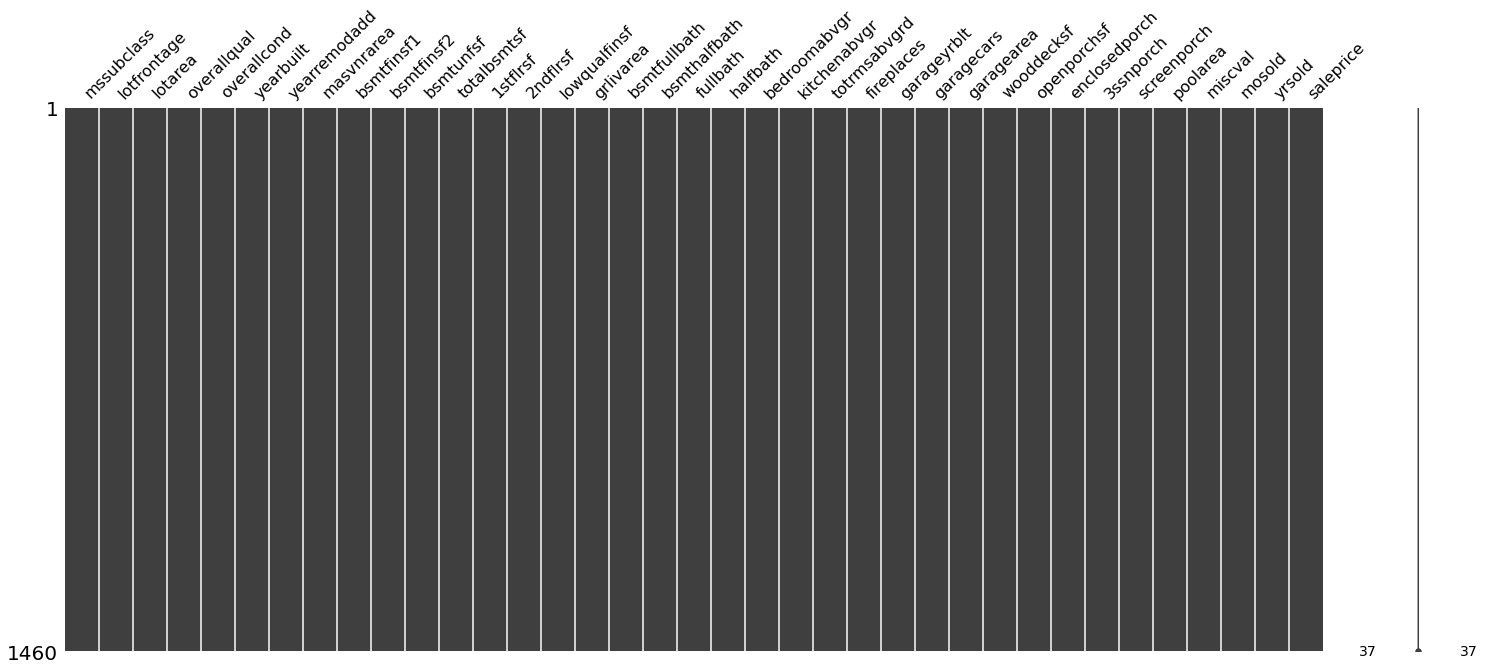

In [87]:
plt.figure(figsize=[36,24],dpi=300)
mn.matrix(train_data.select_dtypes(include=np.number))
plt.show()

<Figure size 10800x7200 with 0 Axes>

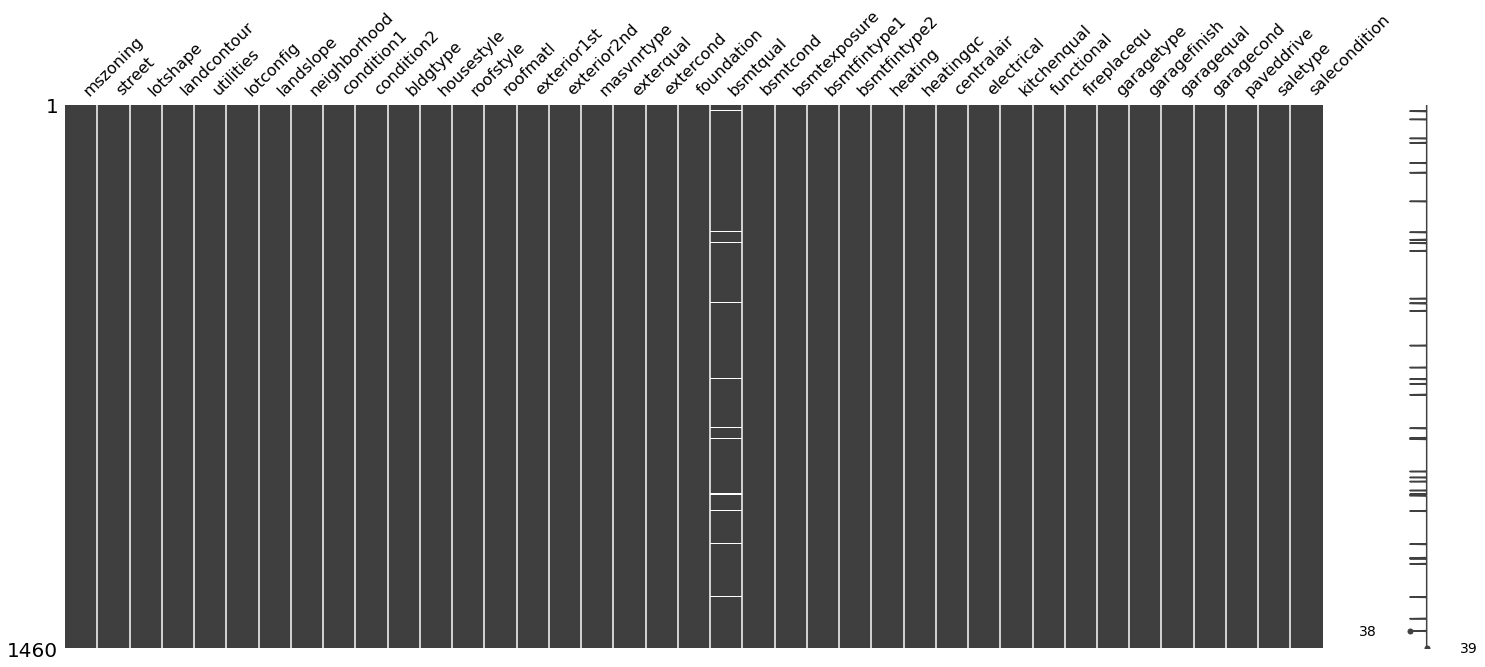

In [88]:
plt.figure(figsize=[36,24],dpi=300)
mn.matrix(train_data.select_dtypes(include=np.object))
plt.show()

In [89]:
train_data.iloc[np.where(train_data['bsmtqual'].isna())][['bsmtqual','bsmtcond']]

,bsmtqual,bsmtcond
id,,
18,NaN,None
40,NaN,None
91,NaN,None
103,NaN,None
157,NaN,None
183,NaN,None
260,NaN,None
343,NaN,None
363,NaN,None


In [90]:
train_data['bsmtqual'].fillna(value='None',inplace=True)
train_data.bsmtqual.isna().sum()

0

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


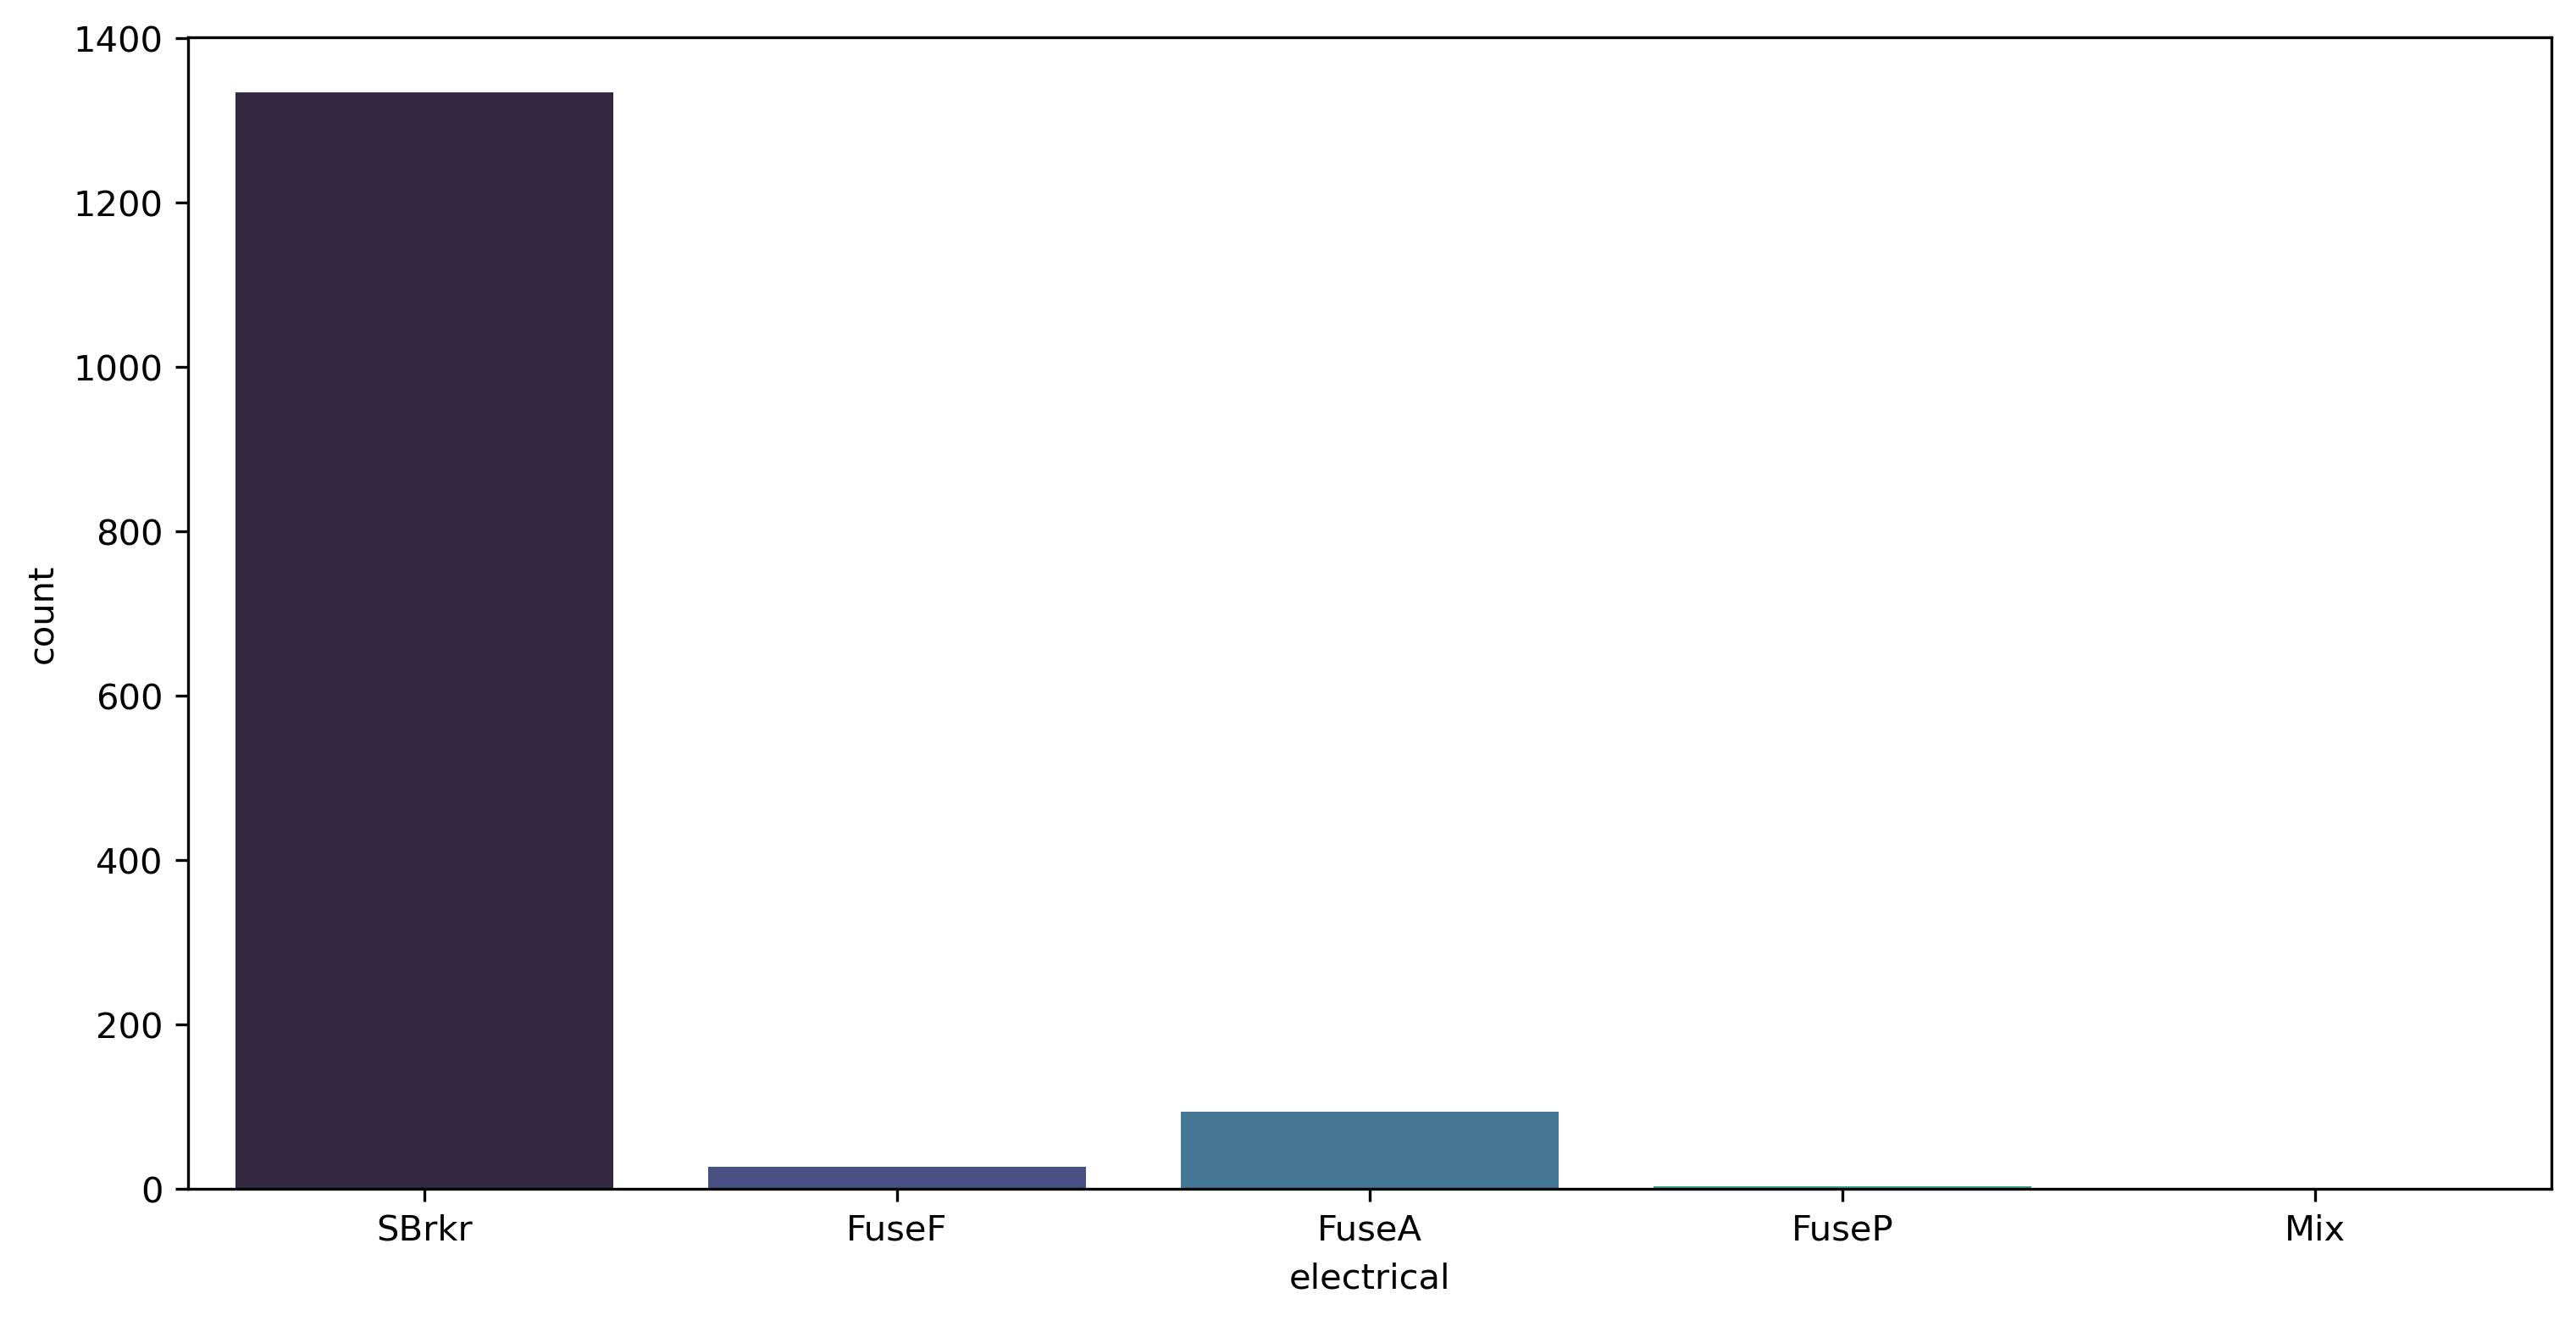

In [91]:
plt.figure(figsize=[12,6],dpi=300)
sns.countplot(train_data['electrical'],palette='mako')
plt.show()

In [93]:
train_data[['housestyle','electrical']].groupby(['housestyle','electrical'])[['electrical']].count()

electrical
housestyle electrical            
1.5Fin     FuseA               24
           FuseF                8
           SBrkr              122
1.5Unf     FuseA                3
           FuseF                3
           SBrkr                8
1Story     FuseA               51
           FuseF               11
           FuseP                2
           Mix                  1
           SBrkr              661
2.5Fin     FuseA                1
           SBrkr                7
2.5Unf     FuseA                2
           FuseF                1
           SBrkr                8
2Story     FuseA               12
           FuseF                3
           FuseP                1
           SBrkr              429
SFoyer     SBrkr               37
SLvl       FuseA                1
           FuseF                1
           SBrkr               62

In [94]:
train_data.iloc[np.where(train_data['electrical'].isna())][['housestyle','electrical']]

,housestyle,electrical
id,,
1380,SLvl,NaN


In [95]:
train_data['electrical'].fillna(value='SBrkr',inplace=True)

In [96]:
train_data.electrical.isna().sum()

0

<Figure size 10800x7200 with 0 Axes>

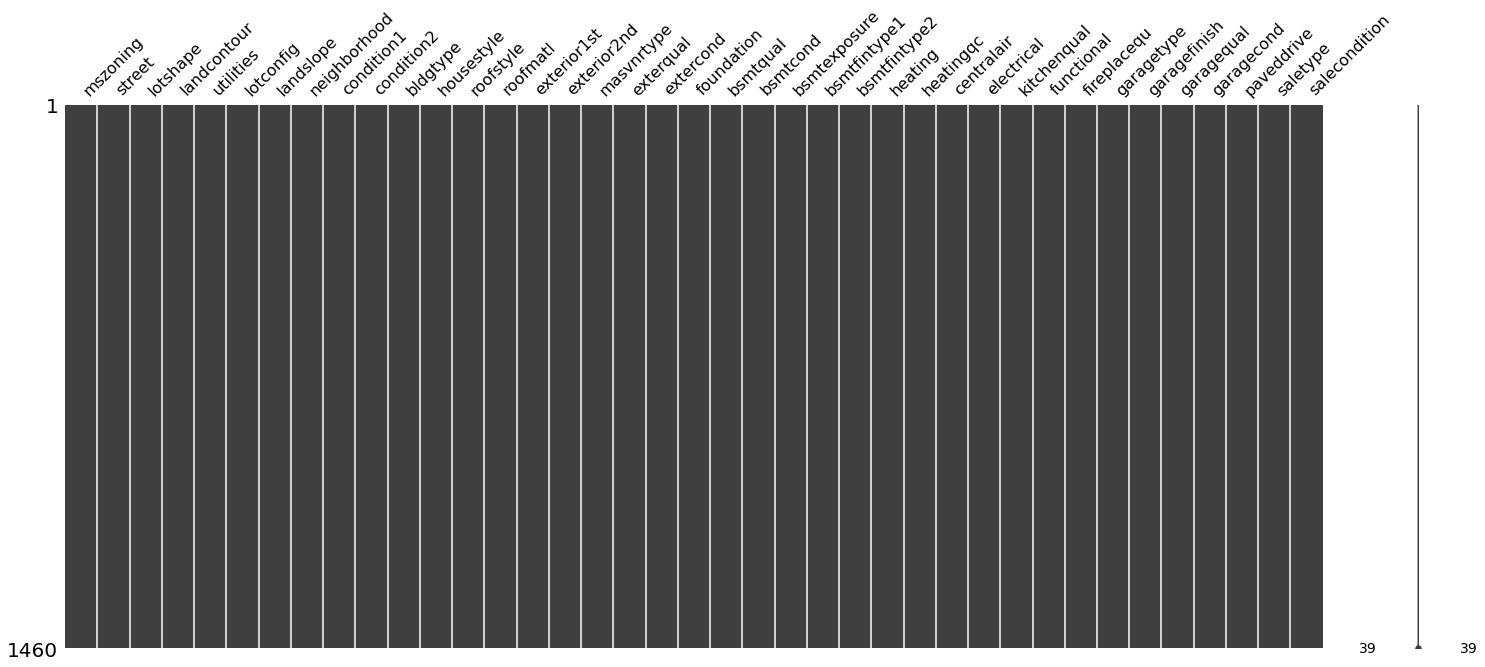

In [97]:
plt.figure(figsize=[36,24],dpi=300)
mn.matrix(train_data.select_dtypes(include=np.object))
plt.show()

In [99]:
train_data.to_pickle('../data/cleaned_train_data.pkl')